# 線グラフを描くプログラムのテンプレート

## 使用モジュールリスト

In [9]:
import numpy as np
# from scipy import ??? # scipyを使ってしたい処理などがあれば読み込む
from scipy import stats as st # 統計処理
import matplotlib as mpl
import matplotlib.pyplot as plt # グラフ描画
import matplotlib.cm as cm  # グラフのカラーマップ

## rmParamsの設定

In [10]:

rcParams_config = {
    # LINES
    "lines.linewidth" : 3,              # 線の太さ
    "lines.linestyle" : "-",            # 線種
    "lines.dash_joinstyle" : "miter",   # 破線の結合部分
    "lines.dash_capstyle" : "butt",     # 破線の角
    "lines.solid_joinstyle" : "miter",  # 線の結合部分
    "lines.solid_capstyle" : "butt",    # 線の角
    "lines.antialiased" : True,         # 線をなめらかにするか
    # FONT
    "font.family" : "arial",            # 使用するフォント名
    "font.style" : "normal",            # 字体
    "font.variant" : "normal",          # 大文字小文字の大きさ
    "font.weight" : "normal",           # フォントの太さ
    "font.stretch" : "normal",          # フォントの拡張
    "font.size" : 14.0,                 # フォントサイズ
    "font.serif" : "Times New Roman",   # 使用するフォント
    # LaTeX
    "text.usetex" : False,              # すべてのテキストにlatexを使うかどうか
    "mathtext.fontset" : "cm",          # 数式Tex表記で使用するフォント設定
    "mathtext.bf" : "serif:bold",
    "mathtext.cal" : "serif", 
    "mathtext.it" : "serif:italic", 
    "mathtext.rm" : "serif", 
    # AXES
    "axes.facecolor" : "white",             # Axesの背景の色
    "axes.edgecolor" : "black",             # Axesの枠の色
    "axes.linewidth" : 1.0,                 # Axesの枠線の太さ
    "axes.grid" : False,                    # Axesにグリッド線を表示するか
    "axes.grid.axis" : "both",              # Axesのどの軸にグリッド線を表示するか
    "axes.grid.which" : "major",            # Axesのどの目盛りのグリッド線を表示するか
    "axes.titlelocation" : "center",        # Axesのタイトルの位置
    "axes.titlesize" : "large",             # Axesのタイトルのサイズ
    "axes.titleweight" : "normal",          # Axesのタイトルの太さ
    "axes.titlecolor" : "auto",             # Axesのタイトルの色
    "axes.titlepad" : 6.0,                  # AxesのタイトルとAxesの間隔
    "axes.labelsize" : 30,                  # Axesのx,y軸ラベルのフォントサイズ
    "axes.labelpad" : 1.0,                  # Axesのx,y軸ラベルと軸の間隔
    "axes.labelweight" : "normal",          # Axesのx,y軸ラベルの太さ
    "axes.labelcolor" : "black",            # Axesのx,y軸ラベルの色
    "axes.formatter.use_mathtext" : True,   # 指数表記をするかどうか
    "axes.formatter.min_exponent" : 1,      # 指数表記にする最小指数の絶対値
    "axes.prop_cycle" : "cycler('color', ['#051e3e', '#251e3e', '#451e3e', '#651e3e', '#851e3e'])",  # 色のサイクル
    "axes.xmargin" : .05,                   # Axesのx方向の余白
    "axes.ymargin" : .05,                   # Axesのy方向の余白
    "axes.zmargin" : .05,                   # Axesのz方向の余白
    # AXIS
    "xaxis.labellocation" : "center",       # x軸のラベルの位置
    "yaxis.labellocation" : "center",       # y軸のラベルの位置
    # TICKS
    "xtick.top" : True,         # Ticksを上側に表示するか
    "xtick.bottom" : True,      # Ticksを上側に表示するか
    "xtick.major.size" : 8.0,   # x軸のmajor Ticksの長さ
    "xtick.minor.size" : 4.0,   # x軸のminor Ticksの長さ
    "xtick.major.width" : 1.0,  # x軸のmajor Ticksの太さ
    "xtick.minor.width" : 1.0,  # x軸のminor Ticksの太さ
    "xtick.major.pad" : 6,      # x軸のmajor Ticksとそのラベルの間隔
    "xtick.minor.pad" : 6,      # x軸のminor Ticksとそのラベルの間隔
    "xtick.labelsize" : 16,     # x軸のTicksのラベルサイズ
    "xtick.direction" : "in",   # x軸のTicksをAxesの内側に表示
    "ytick.left" : True,        # Ticksを上側に表示するか
    "ytick.right" : True,       # Ticksを上側に表示するか
    "ytick.major.size" : 8.0,   # y軸のmajor Ticksの長さ
    "ytick.minor.size" : 4.0,   # y軸のminor Ticksの長さ
    "ytick.major.width" : 1.0,  # y軸のmajor Ticksの太さ
    "ytick.minor.width" : 1.0,  # y軸のminor Ticksの太さ
    "ytick.major.pad" : 6,      # y軸のmajor Ticksとそのラベルの間隔
    "ytick.minor.pad" : 6,      # y軸のminor Ticksとそのラベルの間隔
    "ytick.labelsize" : 16,     # y軸のTicksのラベルサイズ
    "ytick.direction" : "in",   # y軸のTicksをAxesの内側に表示
    # GRIDS
    "grid.color" : "b0b0b0",    # グリッドの色
    "grid.linestyle" : "--",    # グリッドの線種
    "grid.linewidth" : 0.8,     # グリッドの線の太さ
    "grid.alpha" : 1.0,         # グリッドの線の透過率
    # LEGEND
    "legend.loc" : "best",      # 凡例の位置
    "legend.frameon" : False,   # 凡例を枠で囲うか
    "legend.borderaxespad" : 0, # axesと凡例の枠の間隔
    # FIGURE
    "figure.figsize" : "5, 3",      # figureのサイズ
    "figure.subplot.left" : 0.14,   # subplotの左側の余白
    "figure.subplot.right" : 0.90,  # subplotの左側の余白
    "figure.subplot.bottom" : 0.14, # subplotの左側の余白
    "figure.subplot.top" : 0.90,    # subplotの左側の余白
    "figure.autolayout" : False,    # figureの配置を自動で調整するか
    # IMAGES
    "image.aspect" : "equal",   # カラーマップのアスペクト比
    "image.cmap" : "magma",     # カラーマップの配色
    # SCATTER PLOTS
    "scatter.marker" : "s"  # マーカーサイズ
    # その他のパラメータは，.mpistyleファイルを参照
}
plt.rcParams.update(rcParams_config)

## 1.？？？のグラフ

### データの読み込み

In [11]:
# 仮のデータ
data1 = np.array([1, 2, 3, 4, 5])
data2 = np.array([0.01, 3, 2, 4, 10])

# データの読み込み
# data1, data2 = np.loadtxt(fname = '????', comments = '!', unpack = True)

# データの名前
data1_name = 'data1'
data2_name = 'data2'

### グラフを描画

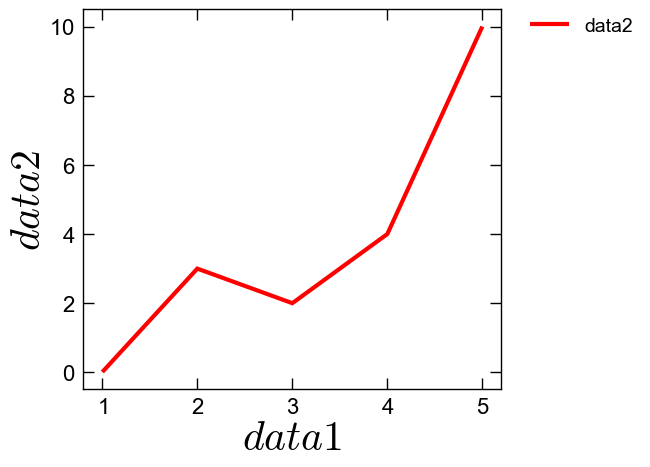

In [12]:
# 図の詳細設定
fig, ax = plt.subplots(1, 1, figsize = (5.5, 5))  # デフォルトサイズはfigsize = (5.5, 5)
ax.set_xlabel(r'$data1$')  # x軸ラベル
ax.set_ylabel(r'$data2$')  # y軸ラベル
# ax.xaxis.label.set_size(30)   # x軸ラベルのフォントサイズ
# ax.yaxis.label.set_size(30)   # y軸ラベルのフォントサイズ
# ax.tick_params(labelsize = 16)    # 目盛りのフォントサイズ, デフォルトは16
# ax.set_xscale('log')    # x軸に対数プロットを適用
# ax.set_yscale('log')    # y軸に対数プロットを適用
# ax.set_xlim(0, 6)   # x軸のプロット範囲
# ax.set_ylim(0, 6)   # y軸のプロット範囲
# ax.set_xticks([0, 1, 2, 3, 4, 5, 6])  # x軸の目盛りを打つ場所を手動で設定
# ax.set_yticks([0, 1, 2, 3, 4, 5, 6])  # y軸の目盛りを打つ場所を手動で設定
# ax.set_xticklabels(["0", "1", "2", "3", "4", "5", "6"])   # x軸の目盛りの表記を手動で設定
# ax.set_yticklabels(["0", "1", "2", "3", "4", "5", "6"])   # y軸の目盛りの表記を手動で設定

# データをプロット
ax.plot(data1, data2, color = 'red', label = data2_name)

# 凡例を追加
plt.legend(bbox_to_anchor = (1.05, 1.0), loc = 'upper left')    # 凡例

# グラフを保存
# fig.savefig('???.svg', bbox_inches = 'tight')